# KEMRI Data Re-use Hackathon Challenge 2022
## by Alex Kakai

## Investigation Overview
><div style="text-align: justify"> Every five years, Kenyan politicians while seeking for elective office, promise the electorate to build new health facilities. However, counties directors of health services are finding it hard to maintain existing hospitals not mentioning the increased pressure to open new facilities.</div>

> <div style="text-align: justify"> The main purpose of this project is to optimize the hospitals' location,functionality, expansion space and workflow insights to bring out new messages to speak to politicians and counties' directors of health.</div>


## Dataset Overview

> The dataset contained data from Murang'a county that contains:
> * Physical status of the facilities (building structure, floors, furniture and plants),
> * Ownership of the institutions (public and private),
> * Annual workflow (i.e. number of patients who visited the facilities), 
> * Location of the facilities (physical land elevation in relation the mean sea level (meters)), 
> * Space availability (land for future expansion),
> * Level of the facilities (National Government Classification of Health Facilities), and 
> * Functionality of the facilities(Whether the facilities are offering the basic minimum health services as prescribed by national GoK policy and guidelines for various categories of health facilities).

In [20]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None  # default='warn'

base_color = sns.color_palette()[0]

In [12]:
# load in the dataset into a pandas dataframe
#Loading the dataset
kemri = pd.read_csv(r'D:\Downloads\Copy of Muranga health facilities capacity physical(987).csv', encoding='latin-1')

## Medical Facility Distribution and Ownership

> <div style="text-align: justify"> Majority of the health facility in the dataset are dispensaries, leading with 78% followed by health Centres at 18% and lastly Sub District hospitals at 4%. Almost all the above health facilities are owned by the government, 97%, with the CBOs owning only 3%.</div>

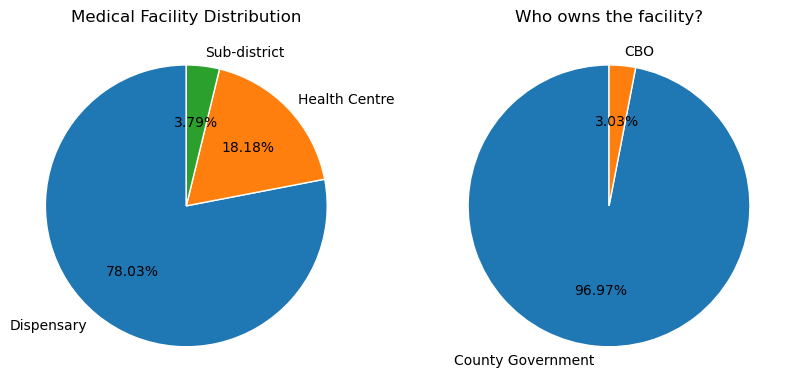

In [13]:
plt.figure(figsize = [10,5])
#Plotting subplots
plt.subplot(1,2,1)
#ploting the health institutions on a pie chart
level = kemri.LEVEL.value_counts()
plt.pie(level,labels =level.index , autopct='%1.2f%%', startangle = 90,
        wedgeprops= {"edgecolor":"white",
                     'linewidth': 1,
                     'antialiased': True})
plt.title('Medical Facility Distribution');
plt.subplot(1,2,2)
#plot of the distribution of who owns the facility?
agency = kemri.AGENCY.value_counts()
plt.pie(agency,labels =agency.index , autopct='%1.2f%%', startangle = 90,
        wedgeprops= {"edgecolor":"white",
                     'linewidth': 1,
                     'antialiased': True})
plt.title('Who owns the facility?');

## Physical Status & Space for Future Expansion

> <div style="text-align: justify"> Majority of the health facilities, 82% are in good condition, this include the building structure, floors, furniture and plants.</div>

> <div style="text-align: justify"> Additionally almost all the facilities, 93%, have space for future expansion. </div>

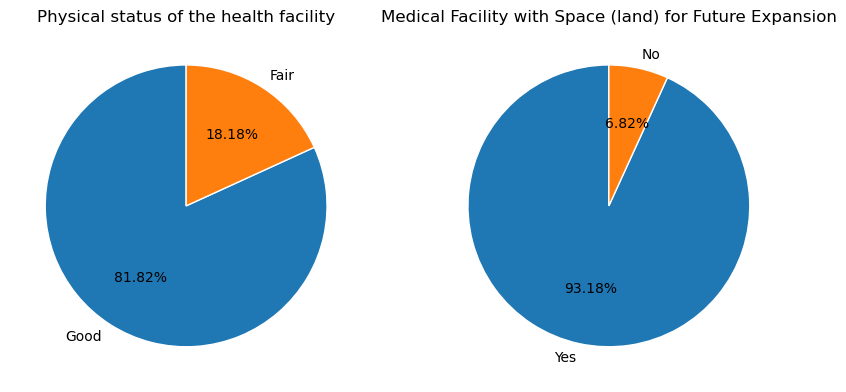

In [14]:
plt.figure(figsize = [10,5])
#Plotting subplots
plt.subplot(1,2,1)
#ploting the health institutions on a pie chart
status = kemri.STATUS3.value_counts()
plt.pie(status,labels =status.index , autopct='%1.2f%%',startangle = 90,
        wedgeprops= {"edgecolor":"white",
                     'linewidth': 1,
                     'antialiased': True})
plt.title('Physical status of the health facility');
plt.subplot(1,2,2)
#plot of the distribution of who owns the facility?
space = kemri.SPACE1.value_counts()
plt.pie(space,labels =space.index , autopct='%1.2f%%',startangle = 90,
        wedgeprops= {"edgecolor":"white",
                     'linewidth': 1,
                     'antialiased': True})
plt.title('Medical Facility with Space (land) for Future Expansion');

## Health Facility Fuctionality and Capcity to offer Prescribed Health Services

> <div style="text-align: justify"> Only 7.5% of the health facilities are in good condition hence can offer the basic minimum health services as prescribed by national GoK policy & guidelines for various categories of health facilities. 40% are fair, 16% average while the remaining 36% are below the expected  minimum.</div>
> <div style="text-align: justify"> Comparing operational outputs (throughput) in relation to available capacity in the respective facilities, almost all the facilities have either minimum capacity (74%) or no capacity at all (20%). Only 5% of the facilities have sufficient installed capacity.</div>

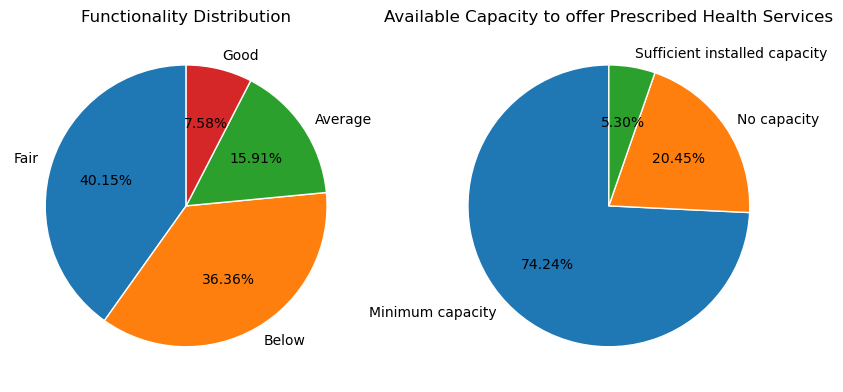

In [15]:
plt.figure(figsize = [10,5])
#Plotting subplots
plt.subplot(1,2,1)
#ploting the health institutions on a pie chart
functionality = kemri.FUNCTIONALITY2.value_counts()
plt.pie(functionality,labels =functionality.index , autopct='%1.2f%%',startangle = 90,
        wedgeprops= {"edgecolor":"white",
                     'linewidth': 1,
                     'antialiased': True})
plt.title('Functionality Distribution');
plt.subplot(1,2,2)
#plot of the distribution of who owns the facility?
Capacity = kemri.Capacity_coded.value_counts()
plt.pie(Capacity,labels =Capacity.index , autopct='%1.2f%%',startangle = 90,
        wedgeprops= {"edgecolor":"white",
                     'linewidth': 1,
                     'antialiased': True})
plt.title('Available Capacity to offer Prescribed Health Services');

## Medical Facility Vs Functionality & Capacity

> <div style="text-align: justify"> Dispensaries have the most cases with facilities whose functionality is below par, likewise they have the highest number of facilities with minimum or no capacity. Sub District hospitals are the best fuctionality wise as they are sufficiently installed with capacity hence their functionality is rated as good.</div>

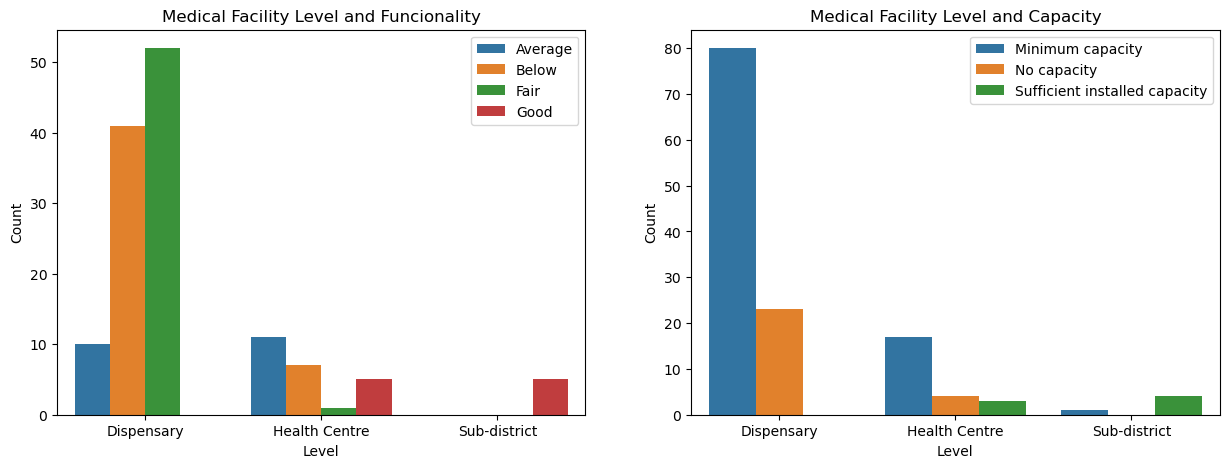

In [16]:
#Plotting subplots
plt.figure(figsize = [15,5])
plt.subplot(1,2,1)
#plot of distribution of whether the facilities are offering the basic minimum health services
ff = kemri.groupby(by = ['LEVEL','FUNCTIONALITY2'])['FACILITY_CODED_IDENTIFY'].count().reset_index()
sns.barplot(data = ff, x = 'LEVEL', y = 'FACILITY_CODED_IDENTIFY', hue = 'FUNCTIONALITY2')
plt.xlabel('Level')
plt.ylabel('Count')
plt.title('Medical Facility Level and Funcionality')
plt.legend(loc='upper right')
plt.subplot(1,2,2)
#plot of distribution of whether the facilities have the required capacity.
fc = kemri.groupby(by = ['LEVEL','Capacity_coded'])['FUNCTIONALITY2'].count().reset_index()
sns.barplot(data = fc, x = 'LEVEL', y = 'FUNCTIONALITY2', hue = 'Capacity_coded')
plt.xlabel('Level')
plt.ylabel('Count')
plt.title('Medical Facility Level and Capacity')
plt.legend(loc='upper right');

## Health Facility Vs Workload

> <div style="text-align: justify"> Dispensaries have the lowest workload with an average of about 10000 visits a year , followed by Health Centers with an average workload of about 15000 visits a year.Sub District hospitals have the highest workload with an average range of between 40000 to 60000 visits a year.</div>

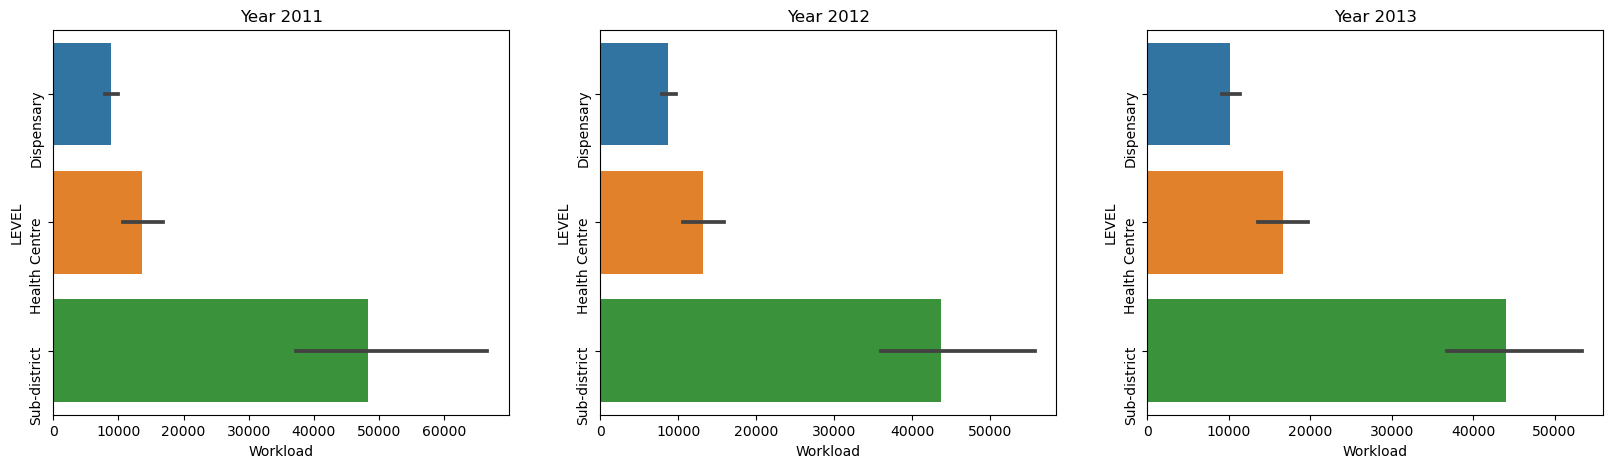

In [17]:
#Bar graphs showing distribution of workload across the different levels
plt.figure(figsize = [20,5])
plt.subplot(1,3,1)
sns.barplot(data = kemri, x ='YEAR_2011' , y = 'LEVEL' )
plt.title('Year 2011')
plt.yticks(rotation = 90)
plt.xlabel('Workload')
plt.subplot(1,3,2)
sns.barplot(data = kemri, x ='YEAR_2012' , y = 'LEVEL' )
plt.title('Year 2012')
plt.yticks(rotation = 90)
plt.xlabel('Workload')
plt.subplot(1,3,3)
sns.barplot(data = kemri, x ='YEAR_2013' , y = 'LEVEL' )
plt.title('Year 2013')
plt.yticks(rotation = 90)
plt.xlabel('Workload');

## Health Facility Vs Workload Vs Physical Land Elevation

> <div style="text-align: justify"> Dispensaries and Health Centers are not affected by physcical land elevation as the yearly visits are almost the same between for facilities above 1200+m and 1200m above sea level. </div>
    
> <div style="text-align: justify">However, for Sub District hospitals patients prefer facilities whose elevevation is less than 1200m as these facilities received higher visits hence higher workload as compared to those with elevevation of 1200+m above sea level. </div>

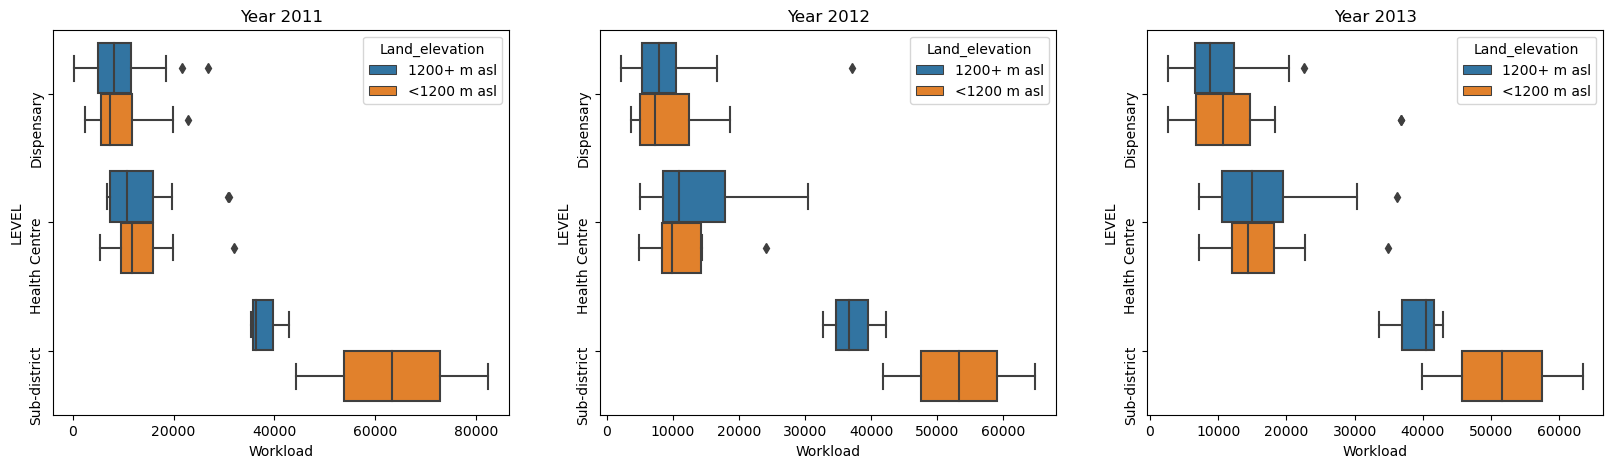

In [18]:
#Boxplot showing distribution of workload across the different levels
plt.figure(figsize = [20,5])
plt.subplot(1,3,1)
sns.boxplot(data = kemri, x ='YEAR_2011' , y = 'LEVEL', hue ='Land_elevation' )
plt.title('Year 2011')
plt.yticks(rotation = 90)
plt.xlabel('Workload')
plt.subplot(1,3,2)
sns.boxplot(data = kemri, x ='YEAR_2012' , y = 'LEVEL', hue ='Land_elevation' )
plt.title('Year 2012')
plt.yticks(rotation = 90)
plt.xlabel('Workload')
plt.subplot(1,3,3)
sns.boxplot(data = kemri, x ='YEAR_2013' , y = 'LEVEL', hue ='Land_elevation' )
plt.title('Year 2013')
plt.yticks(rotation = 90)
plt.xlabel('Workload');

## Key Insights (Pg 1)
> <div style="text-align: justify"> Majority of the facilities are in good condition i.e. the building structure, floors, furniture and plants. Likewise these facilities have sufficient space for expansion. Therefore, we do not need to building new facilities but rather expand the existing facilities.</div>

> <div style="text-align: justify"> Only 7.5% of the health facilities are in good condition while only 5% of the facilities have sufficient installed capacity that can offer the basic minimum health services. This shows that majority of the facilities have below par conditions and under installed capicity. Therefore, more effort should go towards improving the conditions and installing more capacity than building new facilities.</div>

## Key Insights (Pg 2)

> <div style="text-align: justify"> Dispensaries which are the most constructed facilities experience the least workload/visits across the year.These dispensaries are the highest in terms of facilities with below par conditions and have under installed capacity to offer basic minimum health services. Patients shurn dispensaries and prefer to visit to Sub District hospitals which have sufficient installed capacity and good functionality.  Therefore efforts should go towards improving the dispensaries condtions, this will reduce workload towards the much bigger hospitals. </div>


> <div style="text-align: justify"> Patients seems to prefer visiting Sub District hospitals whose location (land elevation) is below 1200m above sea level. When constructing bigger hospital in the future, this is a factor worth considering. Construction to be be done around regions whose elevation is not that high.</div>

<h1><center>THANK YOU!</center></h1>

In [23]:
!jupyter nbconvert KEMRIDataReuse_Slides.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook KEMRIDataReuse_Slides.ipynb to slides
[NbConvertApp] Writing 881483 bytes to KEMRIDataReuse_Slides.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\KAKAI\AppData\Roaming\jupyterlab-desktop\jlab_server\Scripts\jupyter-nbconvert-script.py", line 9, in <module>
    sys.exit(main())
  File "C:\Users\KAKAI\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\KAKAI\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\traitlets\config\application.py", line 976, in launch_instance
    app.start()
  File "C:\Users\KAKAI\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\nbconvert\nbconvertapp.py", line 426, in start
    self.convert_notebooks()
  File "C:\Users\KAKAI\AppData\R